In [3]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno 

pd.set_option('display.max_columns', None)

### Loading the Dataset

In [4]:
crime_data_2024 = pd.read_csv('../data/Crime_Incidents_in_2024.csv')

crime_data_2024.columns = crime_data_2024.columns.str.lower()
crime_data_2024.head()

,x,y,ccn,report_dat,shift,method,offense,block,xblock,yblock,ward,anc,district,psa,neighborhood_cluster,block_group,census_tract,voting_precinct,latitude,longitude,bid,start_date,end_date,objectid,octo_record_id
0,399581.51,129706.92,5094764,2024/09/30 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,100 - 146 BLOCK OF WAYNE PLACE SE,399581.51,129706.92,8.0,8D,7.0,707.0,Cluster 39,009803 3,9803.0,Precinct 124,38.835154,-77.004820,NaN,2005/07/18 08:40:00+00,2024/09/30 13:30:00+00,663361652,NaN
1,397318.16,139543.86,23041354,2024/11/29 05:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1300 - 1399 BLOCK OF EUCLID STREET NW,397318.16,139543.86,1.0,1B,3.0,304.0,Cluster 2,003600 1,3600.0,Precinct 23,38.923765,-77.030927,NaN,2023/03/17 01:57:00+00,2023/03/17 06:30:00+00,663581216,NaN
2,397833.87,138551.89,23101994,2024/02/07 18:11:44+00,DAY,OTHERS,THEFT F/AUTO,900 - 999 BLOCK OF WESTMINSTER STREET NW,397833.87,138551.89,1.0,1B,3.0,305.0,Cluster 3,004402 2,4402.0,Precinct 137,38.914830,-77.024977,NaN,2023/06/25 07:34:00+00,2023/06/25 08:09:00+00,663585104,NaN
3,397576.99,143086.85,20160181,2024/05/22 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,5401 - 5499 BLOCK OF GEORGIA AVENUE NW,397576.99,143086.85,4.0,4D,4.0,403.0,Cluster 18,002101 5,2101.0,Precinct 56,38.955682,-77.027955,NaN,2020/11/09 02:03:53+00,2020/11/09 02:20:49+00,663637331,NaN
4,398010.31,138697.33,24195015,2024/12/17 17:41:13+00,DAY,OTHERS,THEFT/OTHER,1900 - 1999 BLOCK OF 8TH STREET NW,398010.31,138697.33,1.0,1B,3.0,305.0,Cluster 3,004402 2,4402.0,Precinct 137,38.916141,-77.022943,NaN,2024/12/17 16:22:00+00,NaN,663642830,NaN


Creating a copy of the dataset so that we do not modify the orginal.


In [5]:
data = crime_data_2024.copy()  # make a copy of the data

### Checking Missing values

In [6]:
data.isnull().sum()

x                           0
y                           0
ccn                         0
report_dat                  0
shift                       0
method                      0
offense                     0
block                       0
xblock                      0
yblock                      0
ward                        4
anc                         4
district                  745
psa                       468
neighborhood_cluster        4
block_group                15
census_tract               15
voting_precinct             4
latitude                    0
longitude                   0
bid                     23882
start_date                  5
end_date                 2094
objectid                    0
octo_record_id          29297
dtype: int64

Visual Representation

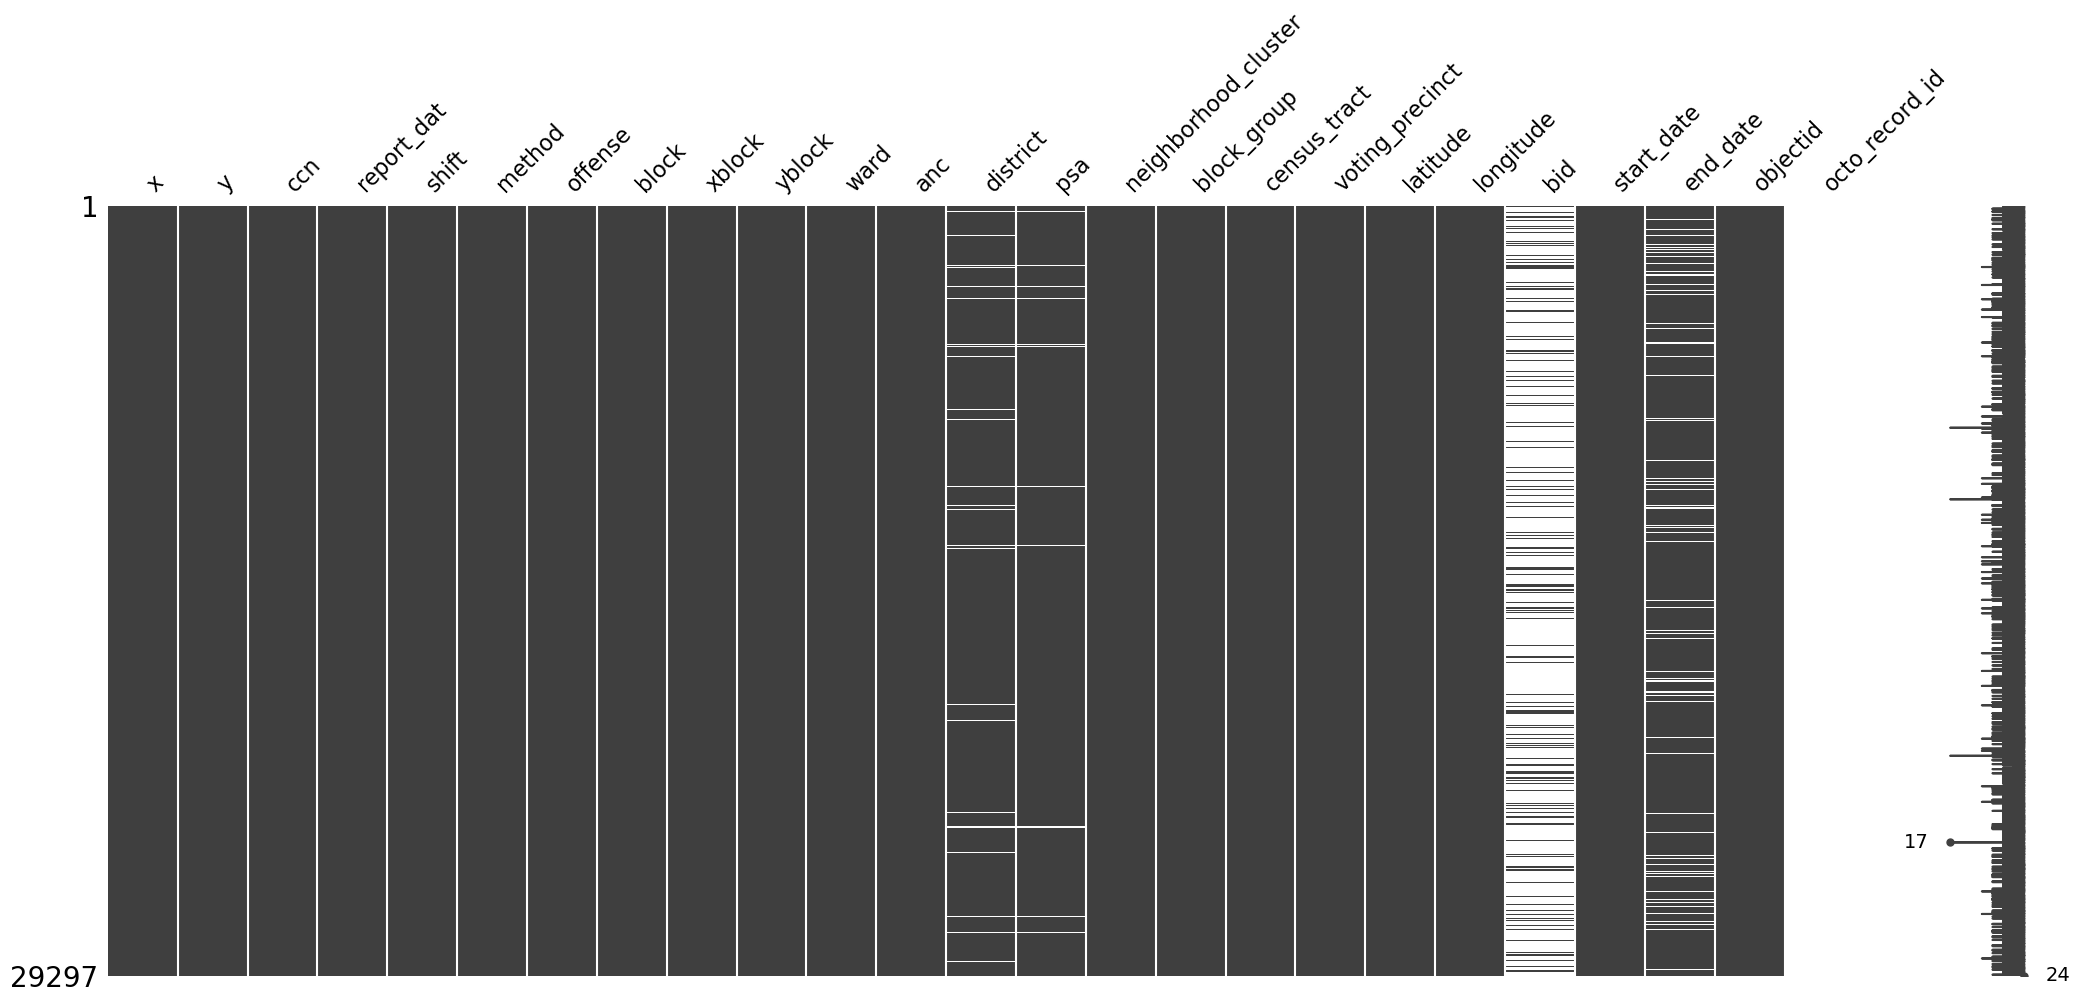

In [7]:
msno.matrix(data) 
plt.show()

For simplicity sake,
- We will drop the `bid` column completely as there is more the 75% missing data. 
- And drop all the rows with missing values. 

#### Dropping rows with missing values

In [8]:
data = data.drop(columns=['bid', 'octo_record_id'])
data = data.dropna()

data.shape

(26491, 23)

So now we have a cleaned dataset that we can save. 

### Saving the dataset

In [11]:
def save_cleaned_data_to_csv(data, filename, path='../data/processed'):
    """
    Save a pandas DataFrame to a CSV file, ensuring the directory path exists.

    :param dataframe: The pandas DataFrame to save.
    :param path: The directory path where the CSV file will be saved.
    :param filename: The name of the CSV file to save the data to.
    """
    try:
        # Ensure the directory path exists
        os.makedirs(os.path.dirname(path), exist_ok=True)
        
        # Save DataFrame to CSV file
        data.to_csv(os.path.join(path, filename), index=False)
        print(f"DataFrame successfully saved to {os.path.join(path, filename)}")
    except Exception as e:
        print(f"An error occurred while saving the DataFrame to CSV: {e}")


save_cleaned_data_to_csv(data, filename='crime_incidents_2024_cleaned.csv')

DataFrame successfully saved to ../data/processed\crime_incidents_2024_cleaned.csv
